In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# soure - https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data

df = pd.read_csv('/Users/kazimakbarov/Documents/Salam.csv')
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
print(df.describe())
print(df.dtypes) # df.info() as alternative

           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e

In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
# Exploring Count of Null Values

df.isnull().sum().sort_values(ascending = False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [6]:
print(df.shape)

print(df['Distance(mi)'].isna().sum())
print(df['Temperature(F)'].isna().sum())
print(df['Wind_Chill(F)'].isna().sum())
print(df['Pressure(in)'].isna().sum())
print(df['Visibility(mi)'].isna().sum())
print(df['Wind_Speed(mph)'].isna().sum())

(7728394, 46)
0
163853
1999019
140679
177098
571233


In [7]:
# Replacing N/A Values with Mean of related Columns

df['Distance(mi)'].fillna(df['Distance(mi)'].mean())
df['Temperature(F)'].fillna(df['Distance(mi)'].mean())
df['Wind_Chill(F)'].fillna(df['Distance(mi)'].mean())
df['Pressure(in)'].fillna(df['Distance(mi)'].mean())
df['Visibility(mi)'].fillna(df['Distance(mi)'].mean())
df['Wind_Speed(mph)'].fillna(df['Distance(mi)'].mean())

0           0.561842
1           0.561842
2           3.500000
3           4.600000
4           3.500000
             ...    
7728389    13.000000
7728390     6.000000
7728391    10.000000
7728392     8.000000
7728393     7.000000
Name: Wind_Speed(mph), Length: 7728394, dtype: float64

In [8]:
# Exploring the duplicated rows

duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [ID, Source, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight]
Index: []

[0 rows x 46 columns]


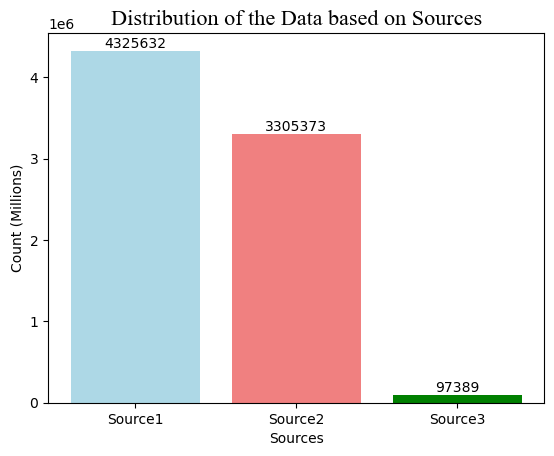

In [9]:
# Distribution of the Data based on Sources

source_data = df["Source"].value_counts()
colors = ['lightBlue','lightcoral',  'Green']

bars = plt.bar(source_data.index, source_data, color  = colors)
plt.xlabel('Sources')
plt.ylabel('Count (Millions)')
plt.title('Distribution of the Data based on Sources',fontsize=16, fontfamily = 'Times New Roman')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
plt.show()



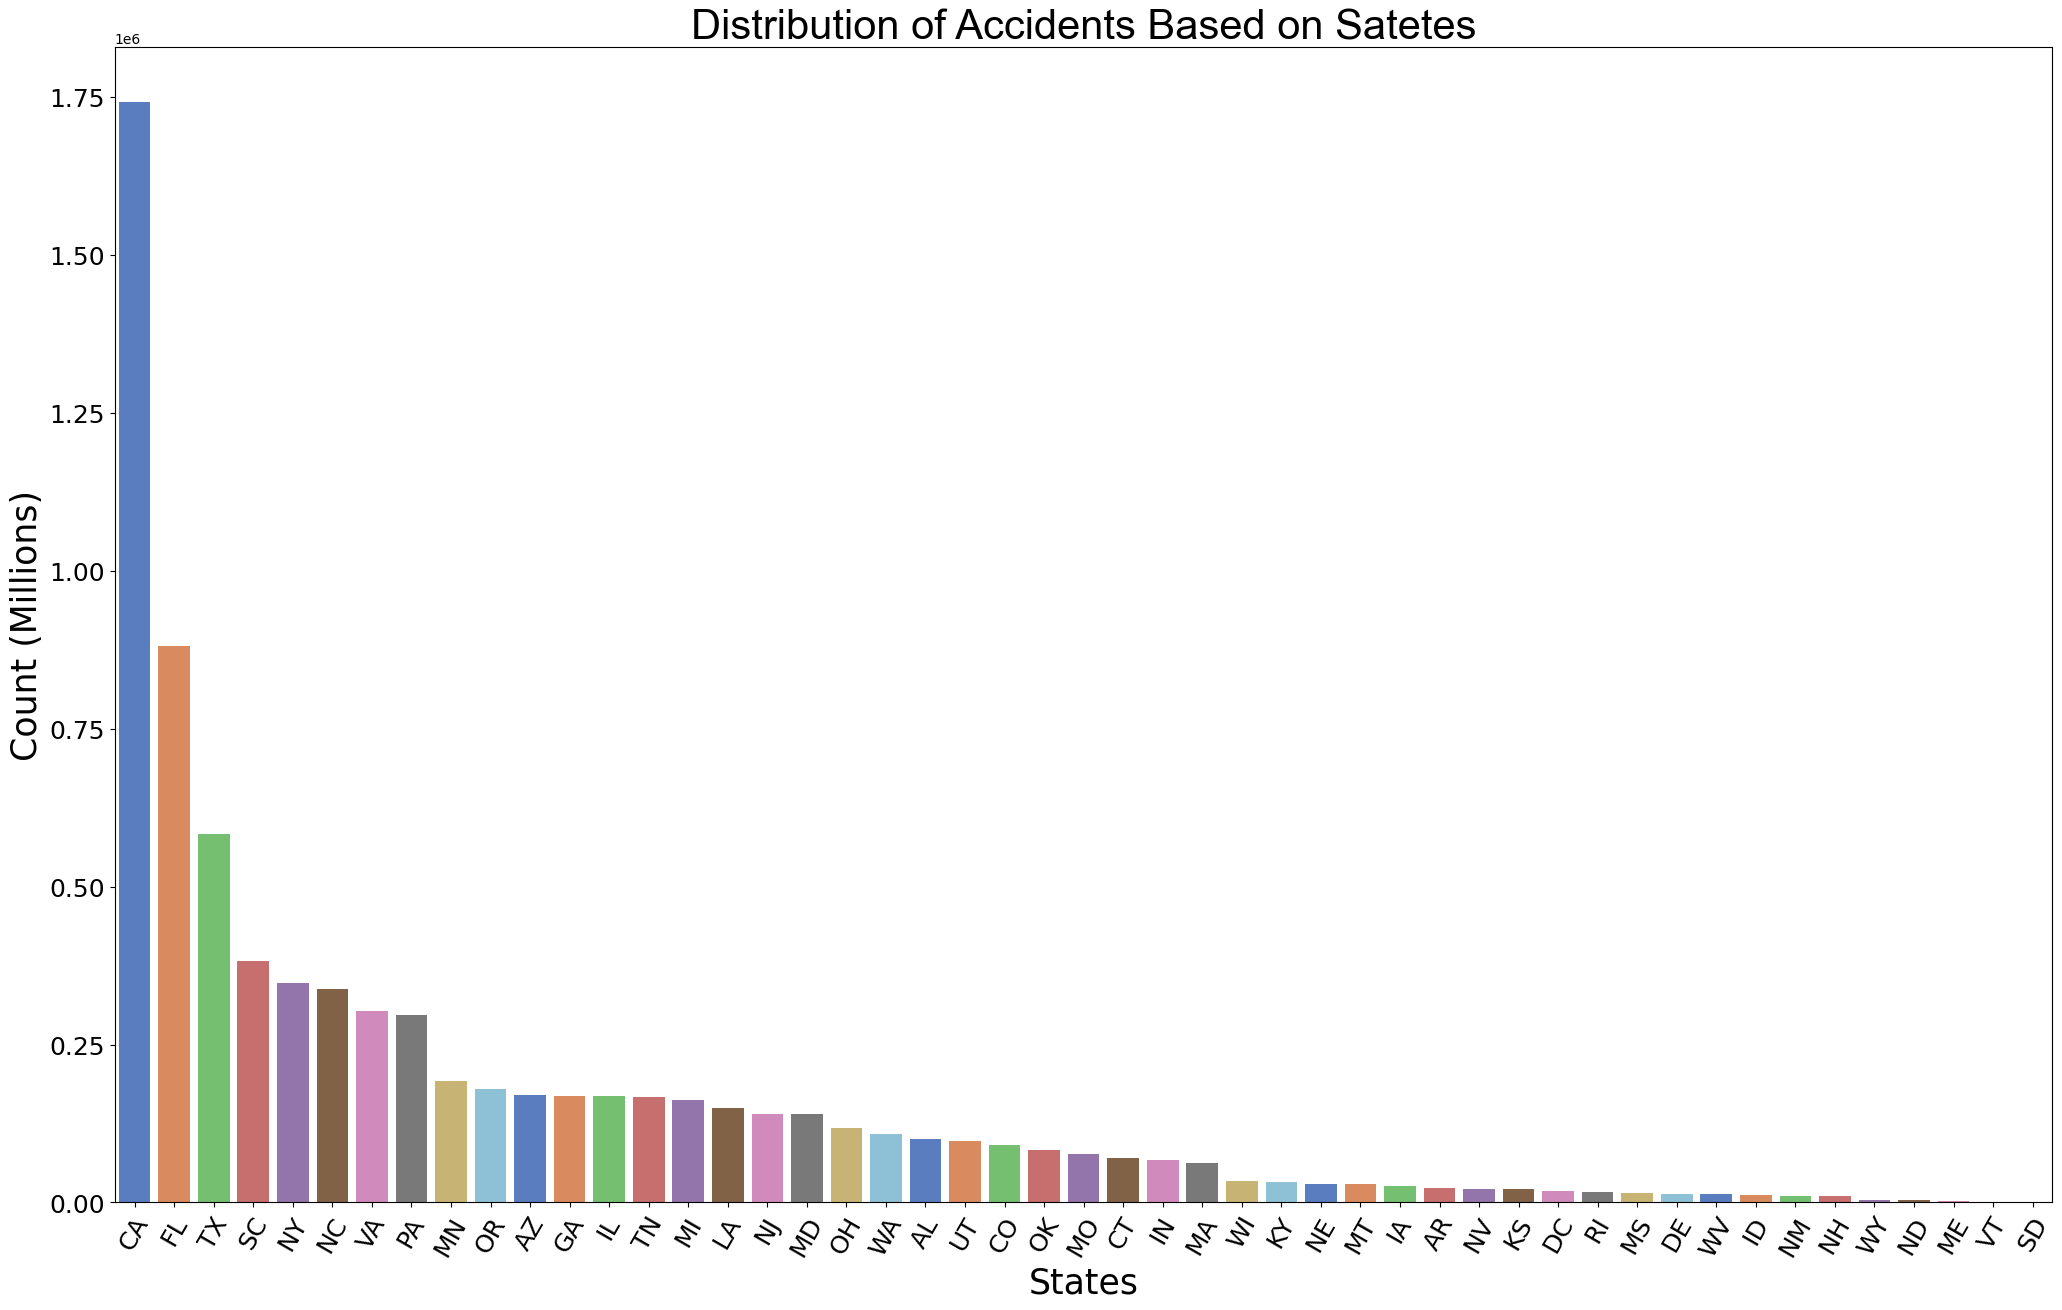

In [10]:
# Distribution of Accidents Based on Satetes

plt.figure(figsize = (25,15))
order_list = df.groupby('State')['State'].count().sort_values(ascending=False)
sns.countplot(data = df, x = df['State'], order = order_list.index, palette = 'muted' )
plt.xticks(rotation=60,size=18)
plt.yticks(size=18)
plt.xlabel('States', size = 25)
plt.ylabel('Count (Millions)', size = 25)
plt.title("Distribution of Accidents Based on Satetes",fontsize=30, fontfamily = 'Arial')
plt.show()

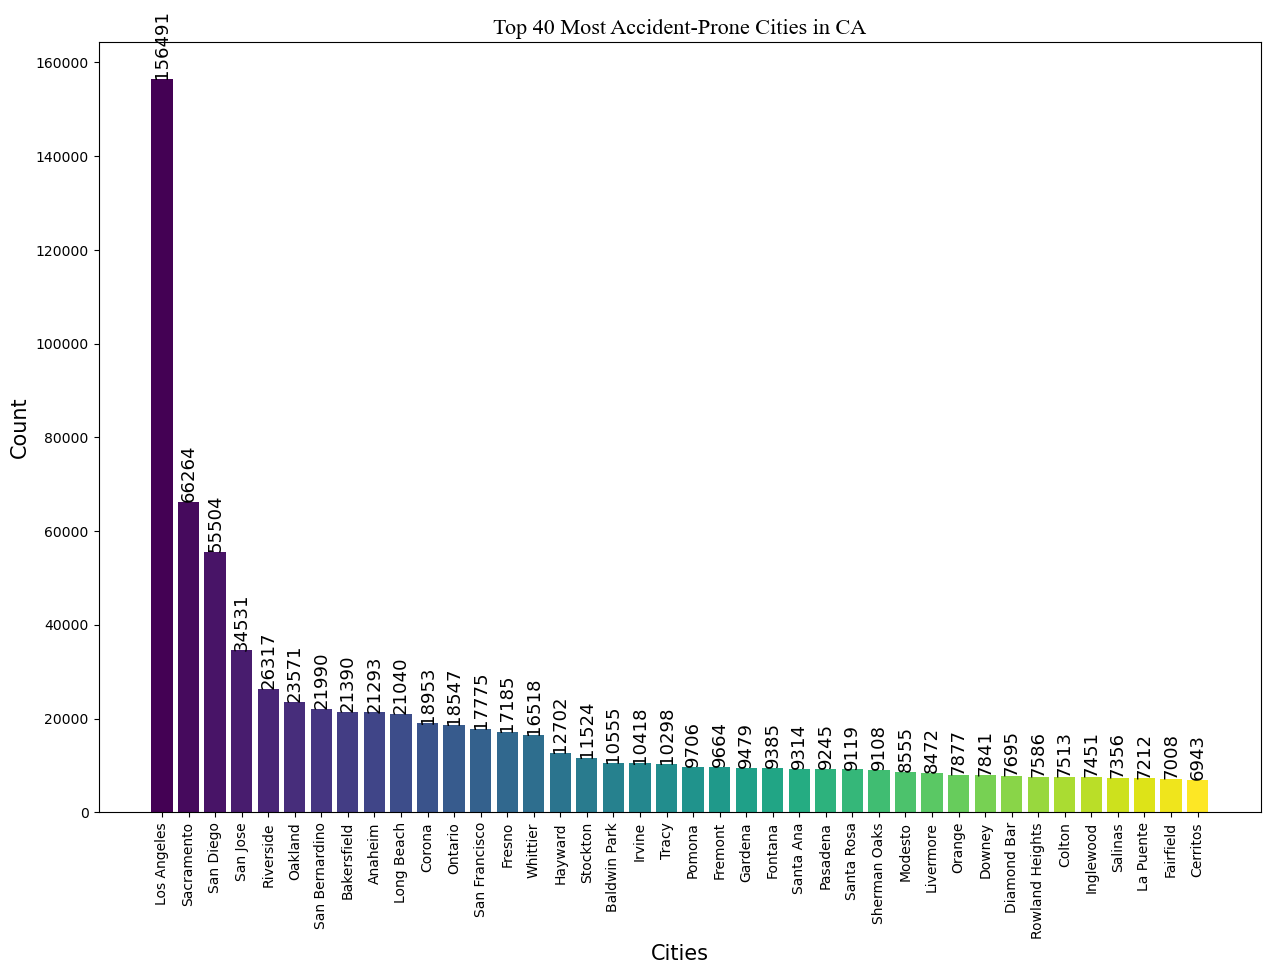

In [11]:
# Top 40 Most Accident-Prone Cities in California

ca_data = df[df['State'] == 'CA']
ca_city = ca_data.groupby('City')['City'].count().sort_values(ascending = False).head(40)
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(ca_city.index))]
plt.figure(figsize = (15,10))
bar = plt.bar(ca_city.index, ca_city, color  = colors)
plt.xlabel('Cities', size = 15)
plt.ylabel('Count', size = 15)
plt.xticks(rotation = 90)
plt.title('Top 40 Most Accident-Prone Cities in CA',fontsize=16, fontfamily = 'Times New Roman')
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom',
             rotation = 90, color = 'black', size = 13)
    


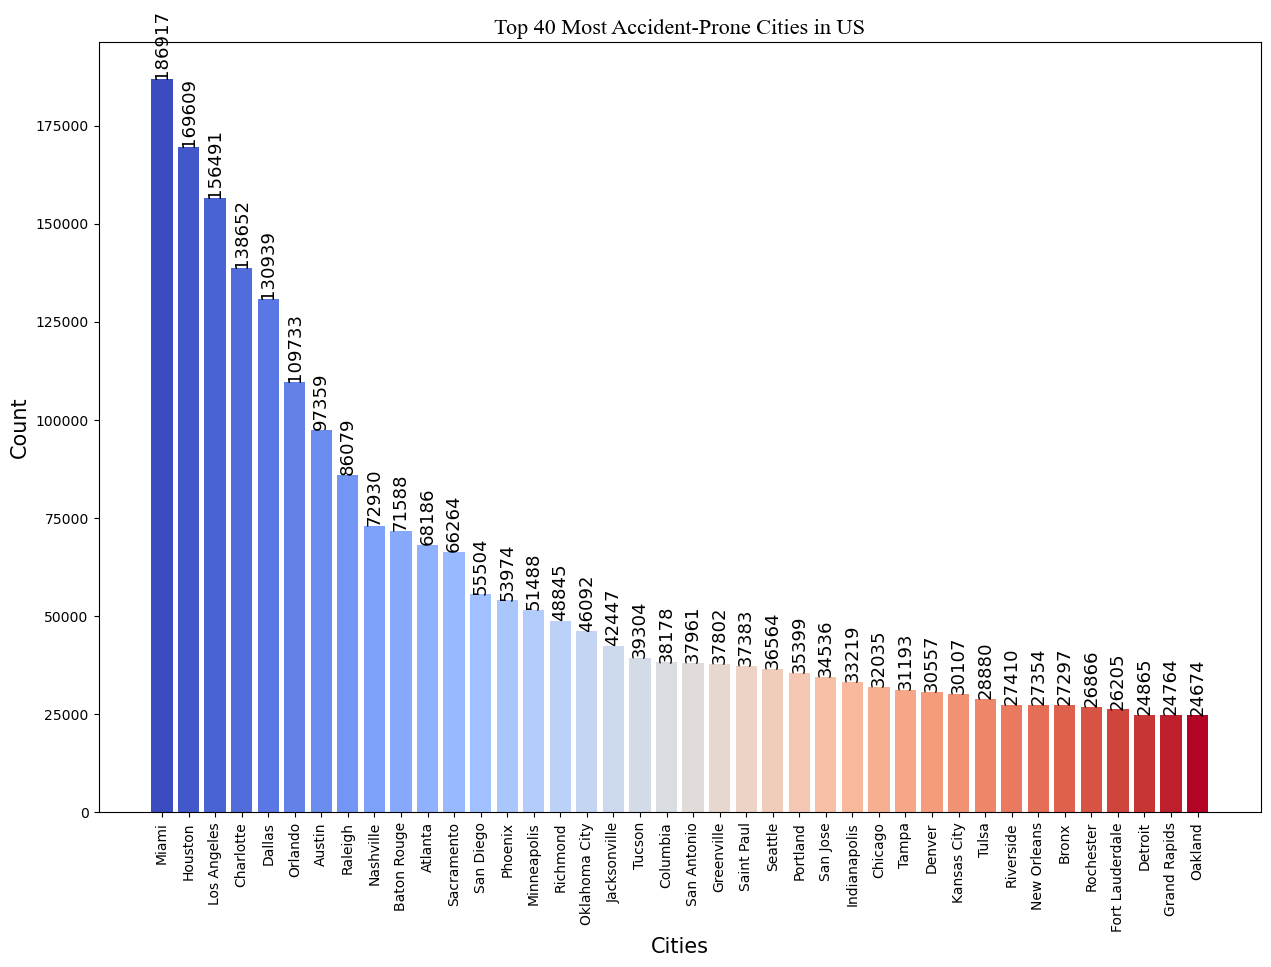

In [12]:
# Top 40 Most Accident-Prone Cities in United States

city_data = df.groupby('City')['City'].count().sort_values(ascending = False).head(40)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, len(city_data.index))]
plt.figure(figsize = (15,10))
bar = plt.bar(city_data.index, city_data, color  = colors)
plt.xlabel('Cities', size = 15)
plt.ylabel('Count', size = 15)
plt.xticks(rotation = 90)
plt.title('Top 40 Most Accident-Prone Cities in US',fontsize=16, fontfamily = 'Times New Roman')
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom',
             rotation = 90, color = 'black', size = 13)

<Figure size 2000x1000 with 0 Axes>

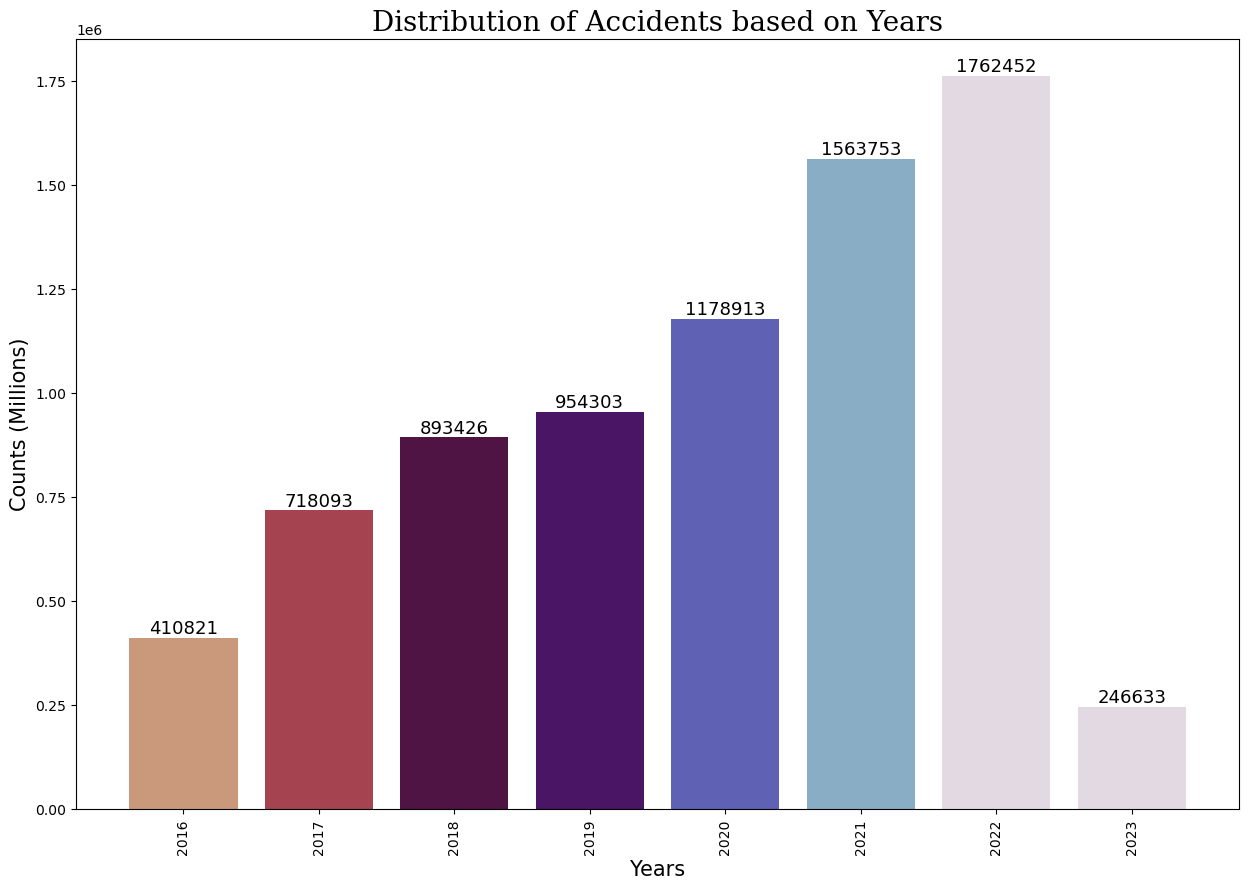

In [13]:
# Distribution of Accidents based on Years

df['Start_Time'] = df['Start_Time'].str.replace(r'\.\d+', '', regex=True)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format = "%Y-%m-%d %H:%M:%S")
df['End_Time'] = df['End_Time'].str.replace(r'\.\d+', '', regex=True)
df['End_Time'] = pd.to_datetime(df['End_Time'], format = "%Y-%m-%d %H:%M:%S")
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Date'] = df['Start_Time'].dt.date
df['Hour'] = df['Start_Time'].dt.hour

plt.figure(figsize=(20,10))
year_data = df.groupby('Year')['ID'].count().sort_values(ascending = False).head(40)
cmap = plt.get_cmap('twilight')
colors = [cmap(i) for i in np.linspace(0, 1, len(year_data.index))]
plt.figure(figsize = (15,10))
bar = plt.bar(year_data.index, year_data, color  = colors)
plt.xlabel('Years', size = 15)
plt.ylabel('Counts (Millions)', size = 15)
plt.xticks(rotation = 90)
plt.title('Distribution of Accidents based on Years',fontsize=20, fontfamily = 'serif')
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom',
              color = 'black', size = 13)

<Figure size 2000x1000 with 0 Axes>

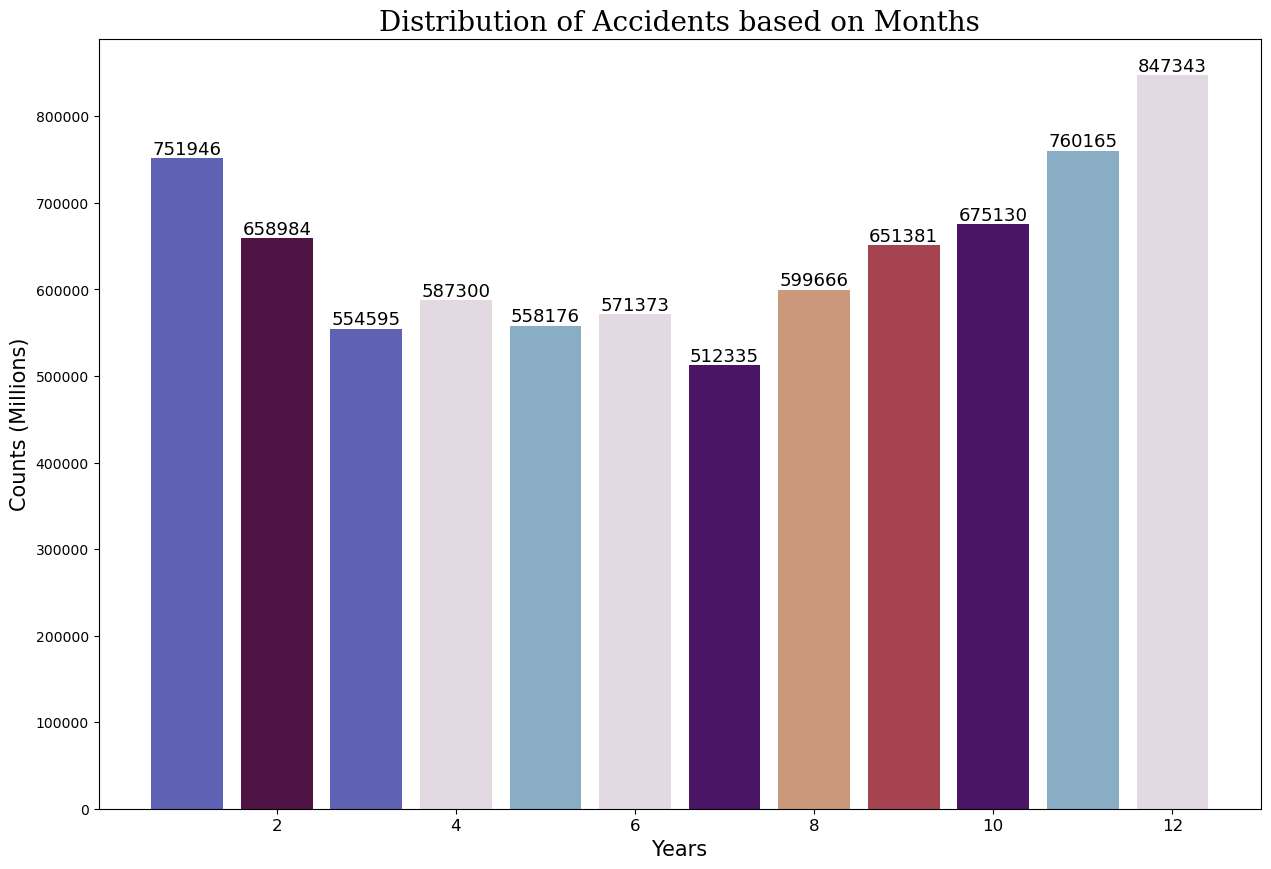

In [14]:
# Distribution of Accidents based on Months

plt.figure(figsize=(20,10))
month_data = df.groupby('Month')['ID'].count().sort_values(ascending = False).head(40)
cmap = plt.get_cmap('twilight')
colors = [cmap(i) for i in np.linspace(0, 1, len(year_data.index))]
plt.figure(figsize = (15,10))
bar = plt.bar(month_data.index, month_data, color  = colors)
plt.xlabel('Years', size = 15)
plt.ylabel('Counts (Millions)', size = 15)
plt.xticks(size = 12)
plt.title('Distribution of Accidents based on Months',fontsize=20, fontfamily = 'serif')
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom',
              color = 'black', size = 13)

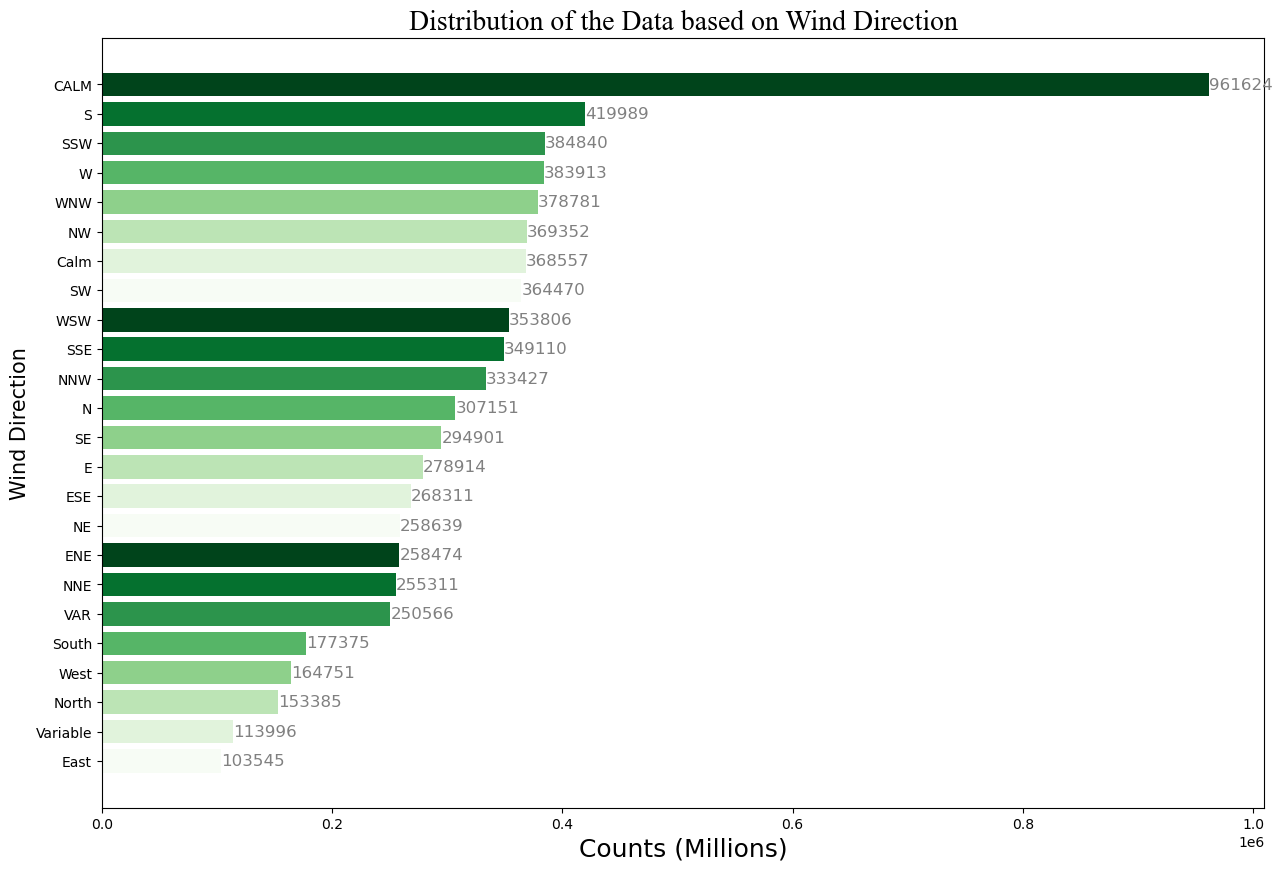

In [15]:
# Distribution of Accidents based on Wind Direction

plt.figure(figsize=(15,10))
wind_data = df["Wind_Direction"].value_counts().sort_values()
cmap = plt.get_cmap('Greens')
colors = [cmap(i) for i in np.linspace(0, 1, len(year_data.index))]

bars = plt.barh(wind_data.index, wind_data, color  = colors)
plt.xlabel('Counts (Millions)', size = 18)
plt.ylabel('Wind Direction', size = 15)
plt.title('Distribution of the Data based on Wind Direction',fontsize=20, fontfamily = 'Times New Roman')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), ha='left', va='center',
            color = 'grey', size = 12)
    
plt.show()

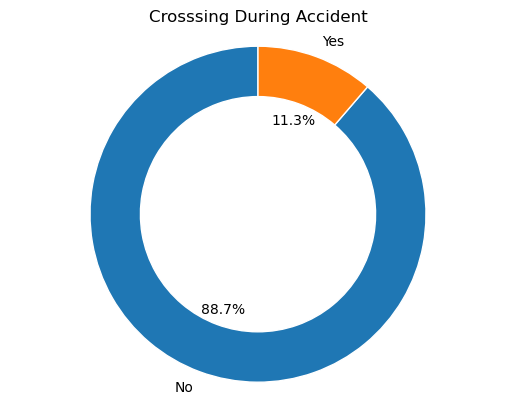

Crossing
No     6,854,631
Yes      873,763
Name: Crossing, dtype: object


In [16]:
# Crossing During Accidents

df['Crossing'].replace(to_replace = False, value = 'No', inplace = True)
df['Crossing'].replace(to_replace = True, value = 'Yes', inplace = True)

cross_data = df.groupby('Crossing')['Crossing'].count()
fig, ax = plt.subplots()
outer_cirlce = plt.pie(cross_data, labels = cross_data.index, autopct='%1.1f%%', 
                     startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))

centre_circle = plt.Circle((0,0),0.2,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Crosssing During Accident')
plt.show()
print(cross_data.map('{:,}'.format))

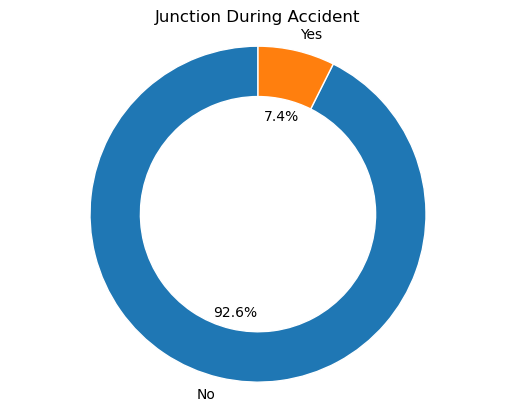

Junction
No     7,157,052
Yes      571,342
Name: Junction, dtype: object


In [17]:
# Junction During Accidents

df['Junction'].replace(to_replace = False, value = 'No', inplace = True)
df['Junction'].replace(to_replace = True, value = 'Yes', inplace = True)

junction_data = df.groupby('Junction')['Junction'].count()
fig, ax = plt.subplots()
outer_cirlce = plt.pie(junction_data, labels = junction_data.index, autopct='%1.1f%%', 
                     startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
centre_circle = plt.Circle((0,0),0.2,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Junction During Accident')
plt.show()
print(junction_data.map('{:,}'.format))


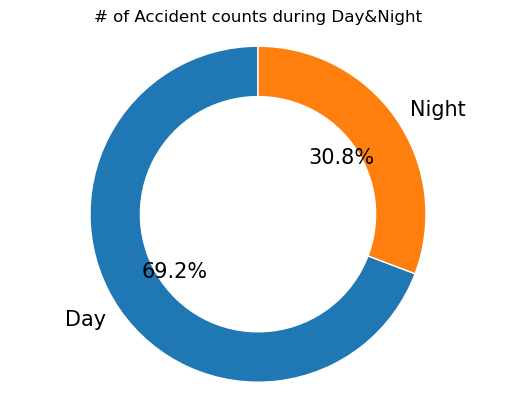

Sunrise_Sunset
Day      5,334,553
Night    2,370,595
Name: Sunrise_Sunset, dtype: object


In [18]:
# Accident counts durin Day&Night


sun_data = df.groupby('Sunrise_Sunset')['Sunrise_Sunset'].count()
fig, ax = plt.subplots()
outer_cirlce = plt.pie(sun_data, labels = sun_data.index, autopct='%1.1f%%', 
                     startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'), textprops = {'size': 15})
centre_circle = plt.Circle((0,0),0.2,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('# of Accident counts during Day&Night')
plt.show()
print(sun_data.map('{:,}'.format))

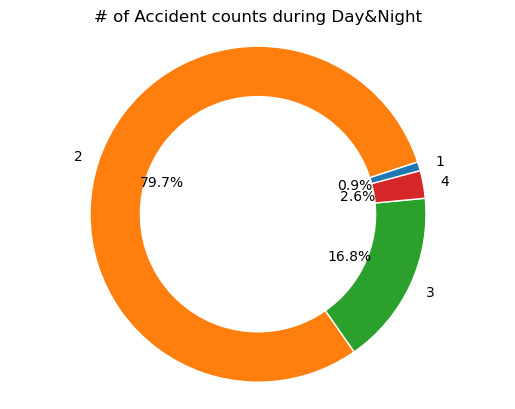

Severity
1       67,366
2    6,156,981
3    1,299,337
4      204,710
Name: Severity, dtype: object


In [19]:
# Accidents Severity


severity_data = df.groupby('Severity')['Severity'].count()
fig, ax = plt.subplots()
outer_cirlce = plt.pie(severity_data, labels = severity_data.index, autopct='%1.1f%%', 
                     startangle=15, wedgeprops=dict(width=0.3, edgecolor='w'), textprops = {'size': 10})
centre_circle = plt.Circle((0,0),0.2,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('# of Accident counts during Day&Night')
plt.show()
print(severity_data.map('{:,}'.format))


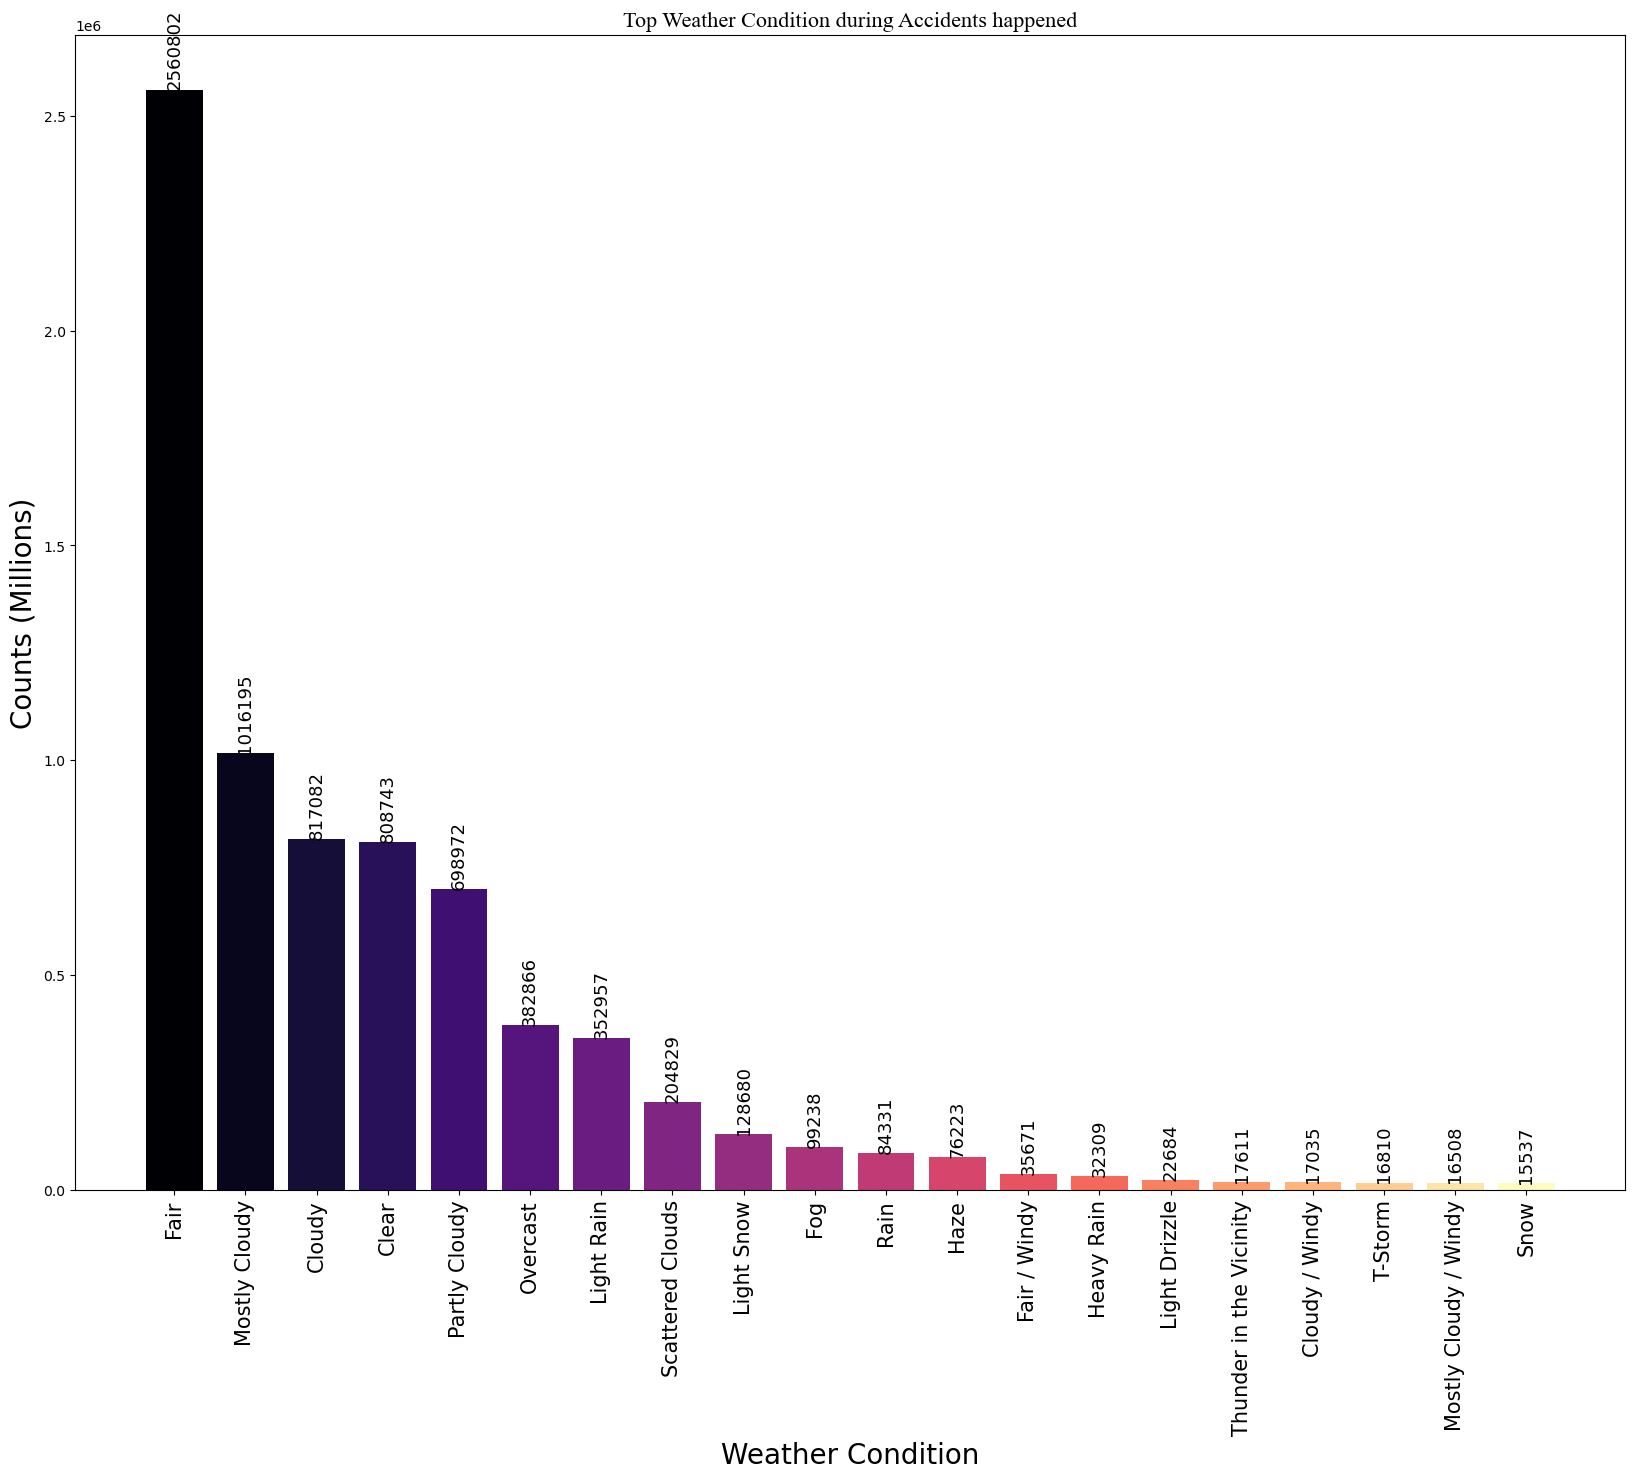

In [20]:
# Top Weather Condition while Accidents happened

wc_data = df.groupby('Weather_Condition')['Weather_Condition'].count().sort_values(ascending = False).head(20)
cmap = plt.get_cmap('magma')
colors = [cmap(i) for i in np.linspace(0, 1, len(wc_data.index))]
plt.figure(figsize = (20,15))
bar = plt.bar(wc_data.index, wc_data, color  = colors)
plt.xlabel('Weather Condition', size = 20)
plt.ylabel('Counts (Millions)', size = 20)
plt.xticks(rotation = 90, size = 15)
plt.title('Top Weather Condition during Accidents happened',fontsize=16, fontfamily = 'Times New Roman')
for bar in bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom',
             rotation = 90, color = 'black', size = 13)

In [21]:
print('Average Daily Accidents: ',round(df.groupby('Date')['ID'].count().mean(),2))
print('Average Yearly Accidents: ',round(df.groupby('Year')['ID'].count().mean(),2))
df.groupby('Year')['ID'].count().map('{:,}'.format)

Average Daily Accidents:  3004.82
Average Yearly Accidents:  966049.25


Year
2016      410,821
2017      718,093
2018      893,426
2019      954,303
2020    1,178,913
2021    1,563,753
2022    1,762,452
2023      246,633
Name: ID, dtype: object

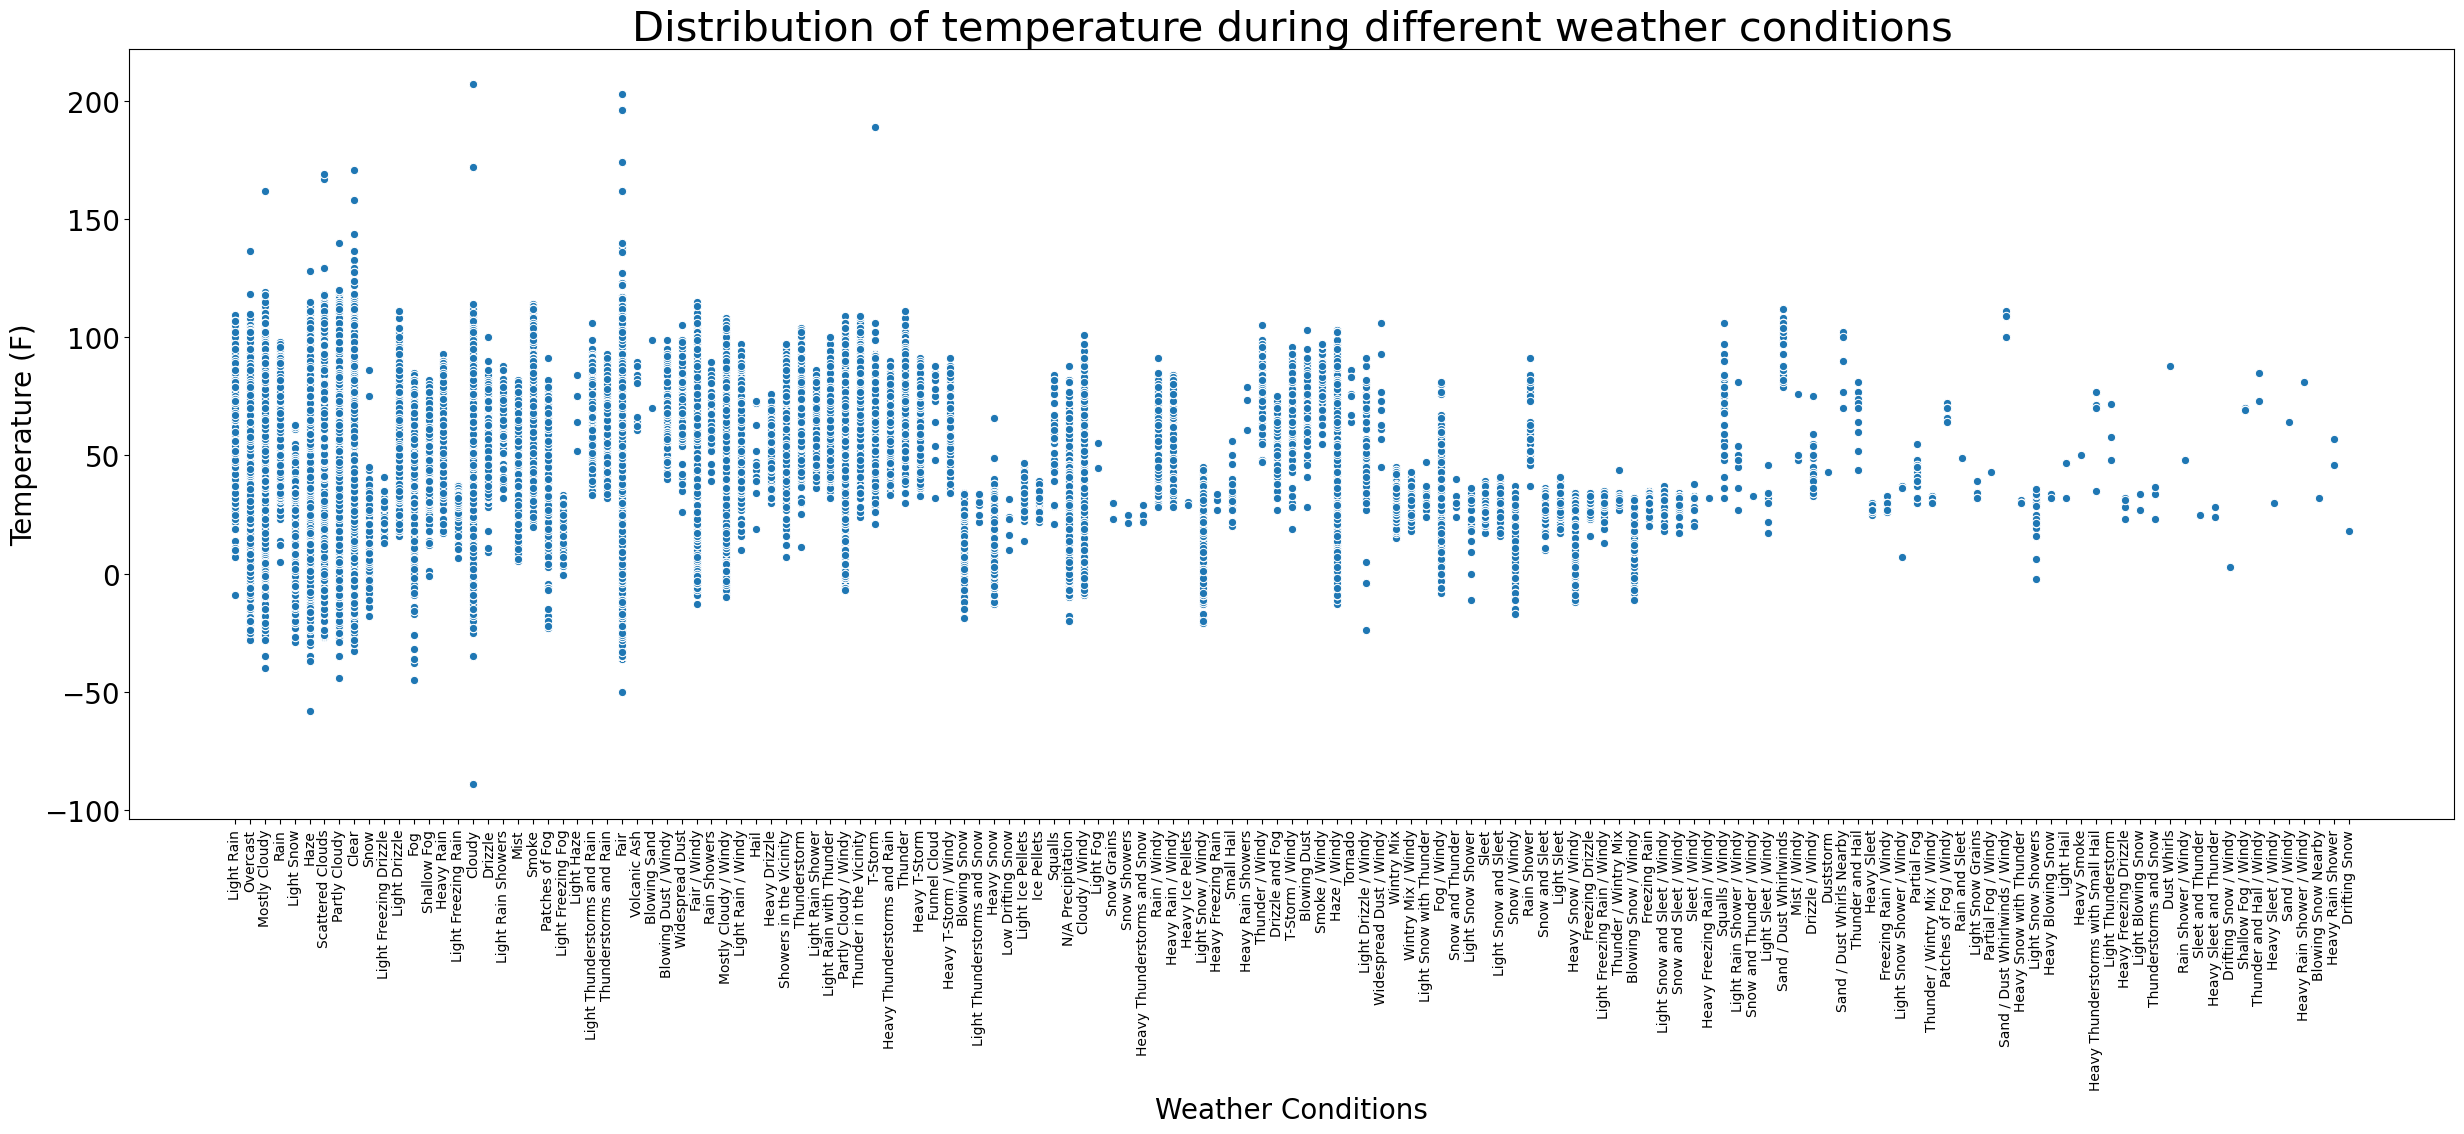

In [22]:
# Distribution of temperature during different weather conditions

plt.figure(figsize = (30,10))
sns.scatterplot(data = df,x=df["Weather_Condition"],y=df["Temperature(F)"])
plt.xlabel( 'Weather Conditions', size=20)
plt.ylabel( 'Temperature (F)',size=20)
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.title("Distribution of temperature during different weather conditions",size=30)
plt.show()

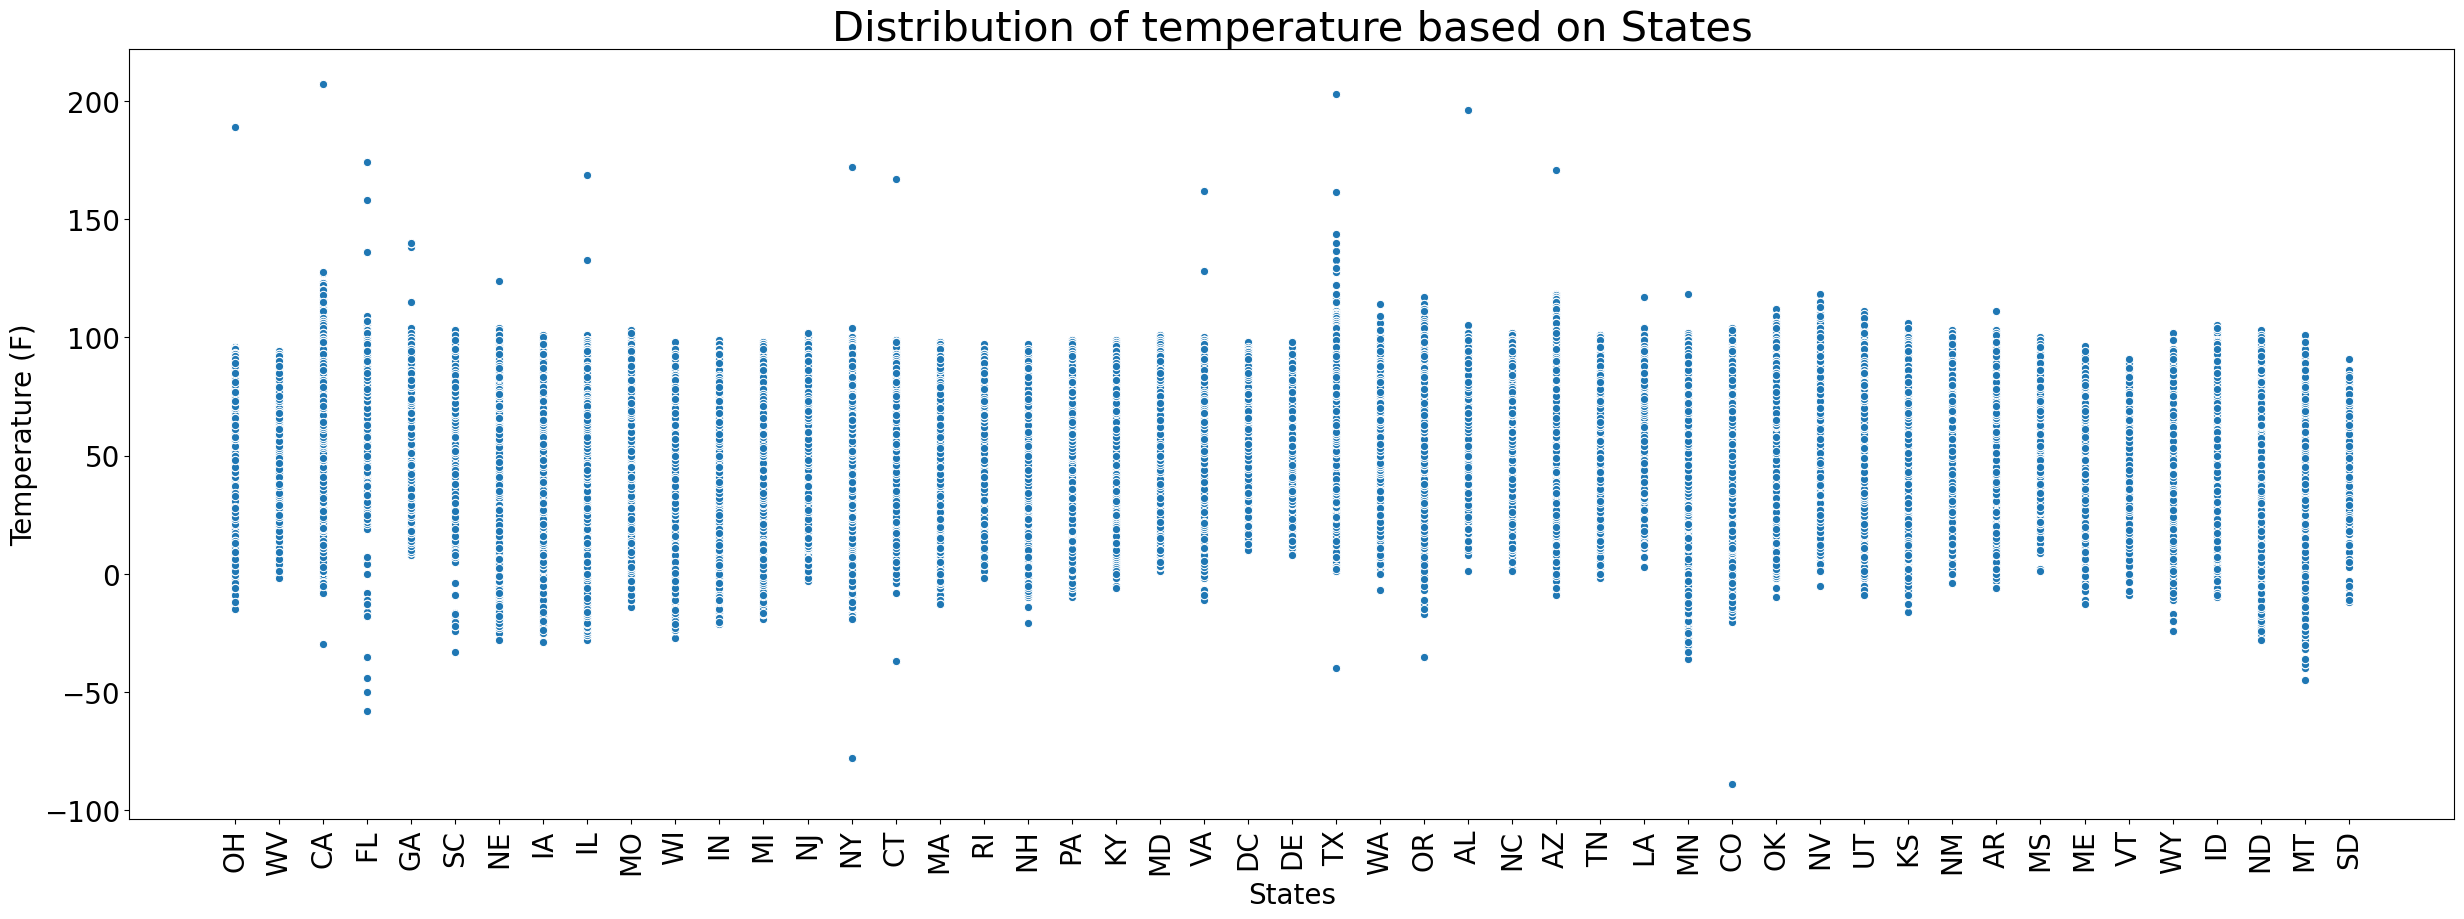

In [23]:
# Distribution of temperature based on States

plt.figure(figsize = (30,10))
sns.scatterplot(data = df,x=df["State"],y=df["Temperature(F)"])
plt.xlabel( 'States', size=20)
plt.ylabel( 'Temperature (F)',size=20)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.title("Distribution of temperature based on States",size=30)
plt.show()

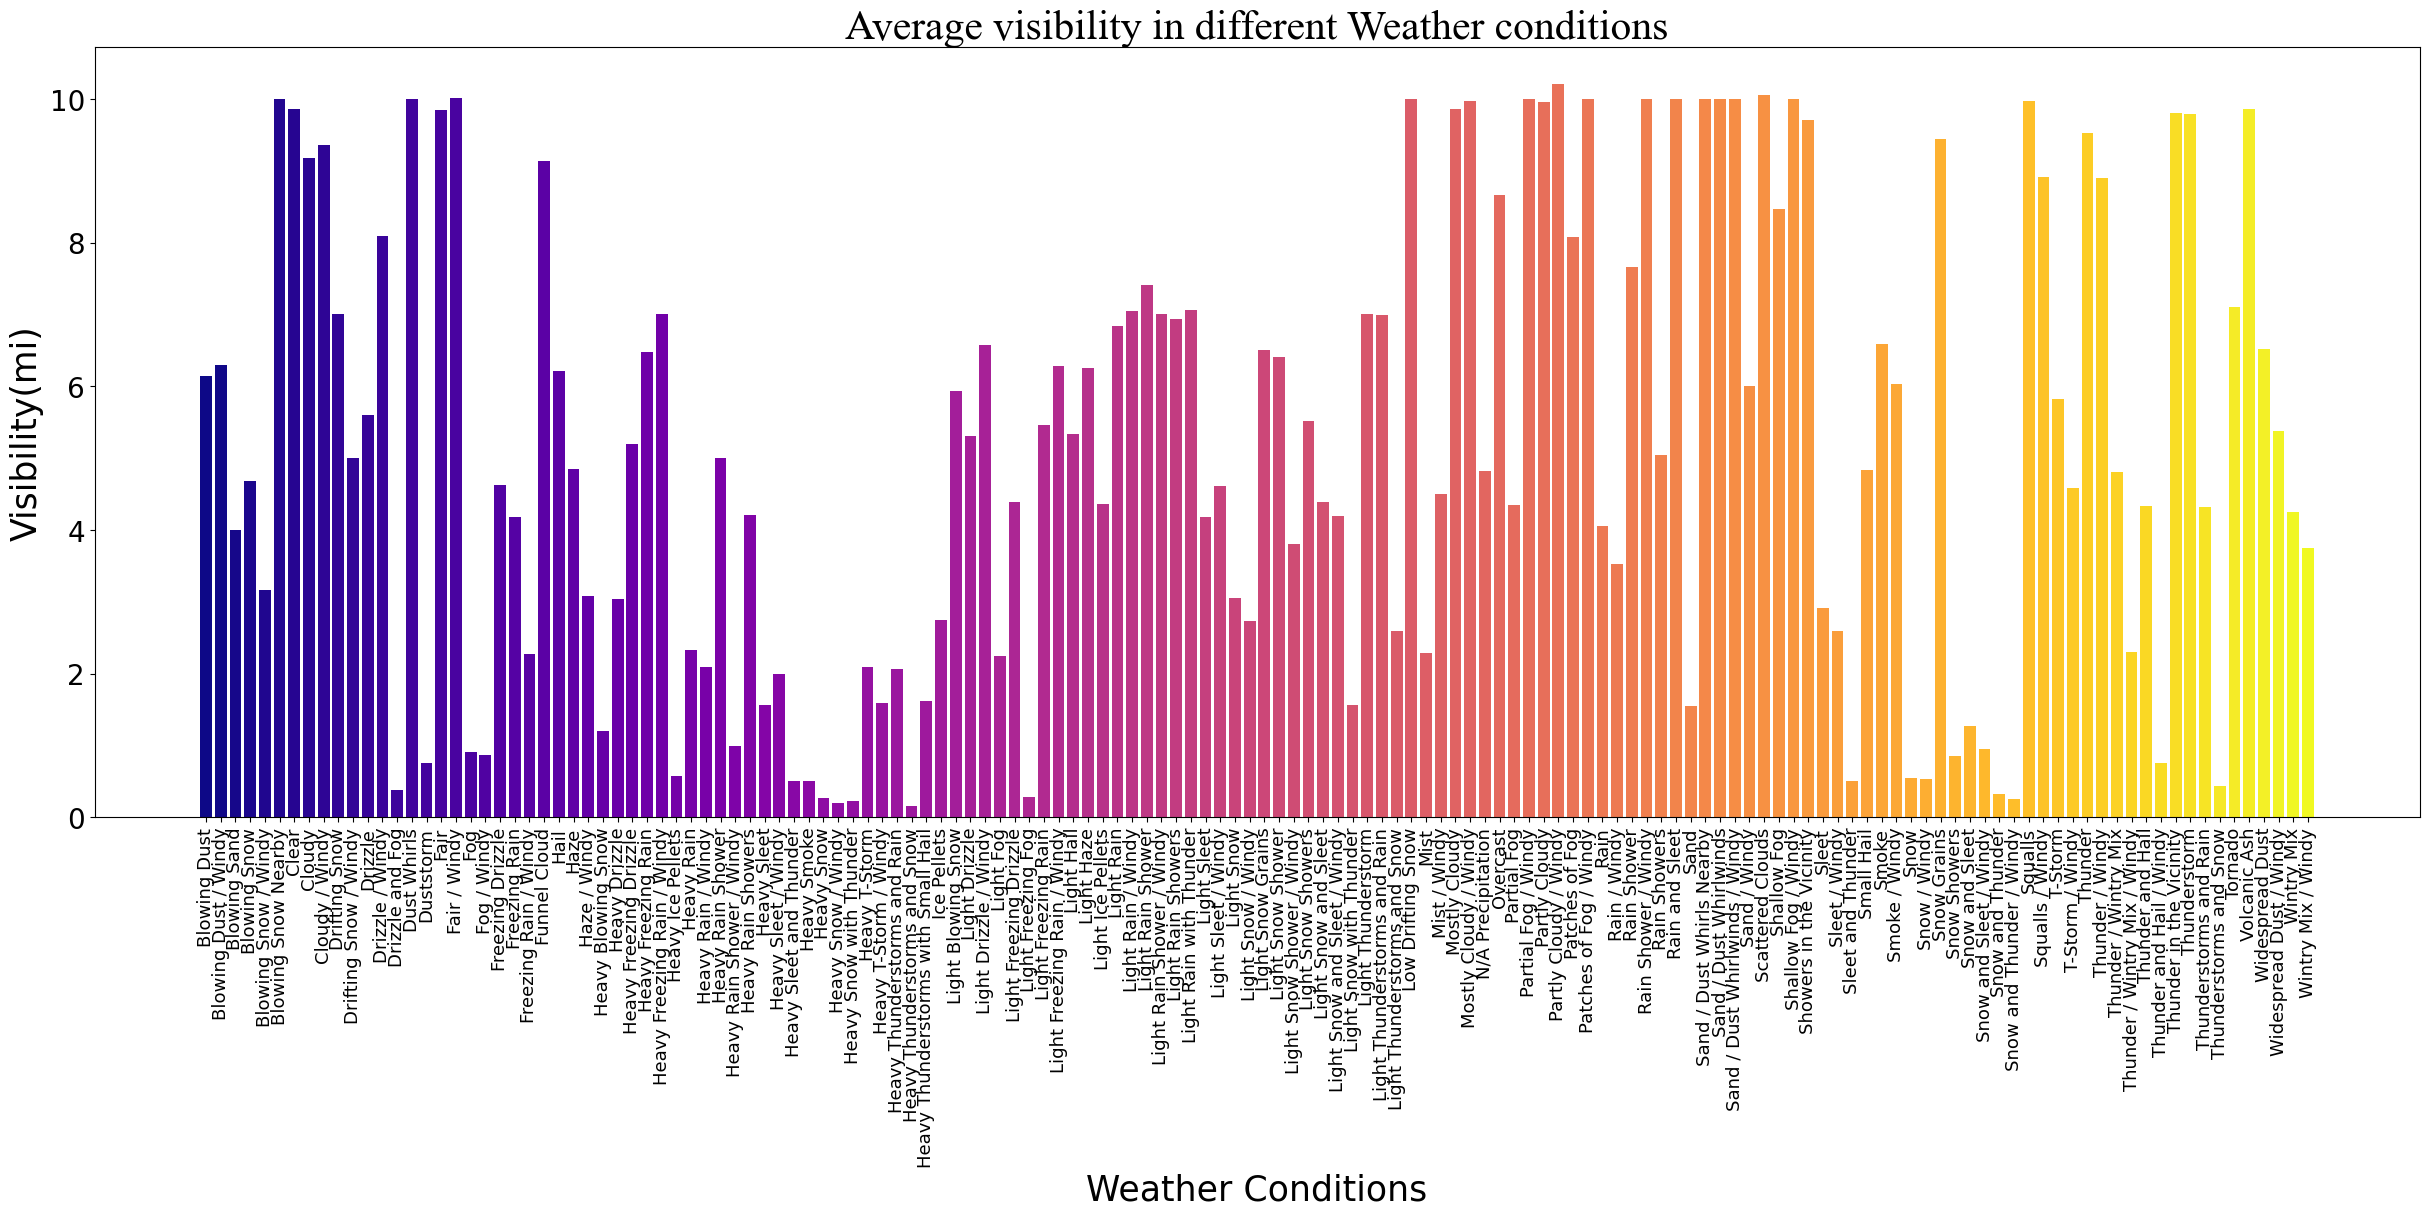

In [24]:
# Average visibility in different Weather Conditions

avg_vis = df.groupby('Weather_Condition')['Visibility(mi)'].mean()
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, len(avg_vis.index))]
plt.figure(figsize = (30,10))
plt.bar(avg_vis.index, avg_vis, color  = colors)
plt.xlabel('Weather Conditions', size = 25)
plt.ylabel('Visibility(mi)', size = 25)
plt.xticks(rotation = 90, size = 13)
plt.yticks(size = 20)
plt.title('Average visibility in different Weather conditions',fontsize=30, fontfamily = 'Times New Roman')
plt.show()


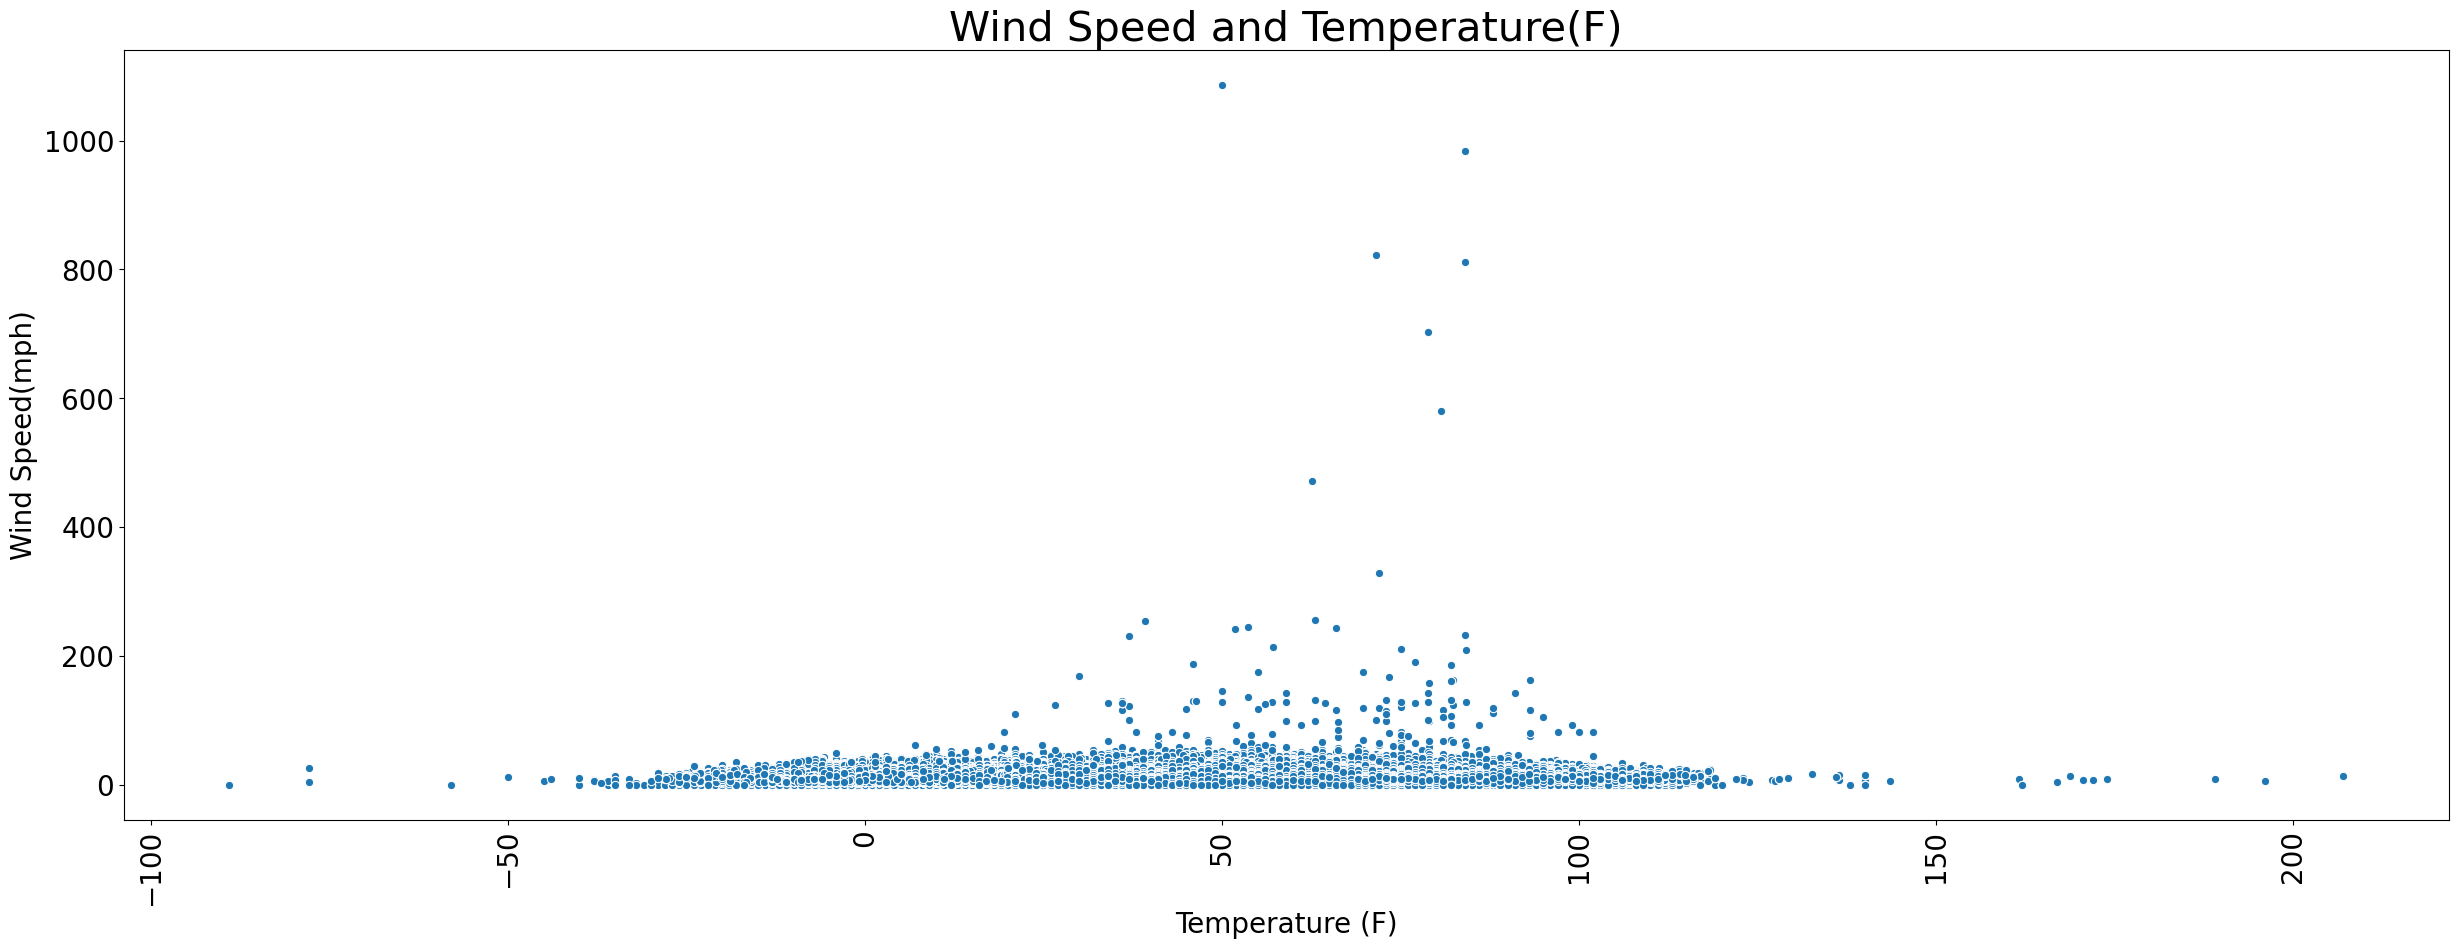

In [25]:
# Wind Speed and Temperature(F)

plt.figure(figsize = (30,10))
sns.scatterplot(data = df,x=df["Temperature(F)"],y=df["Wind_Speed(mph)"])
plt.ylabel( 'Wind Speed(mph)', size=20)
plt.xlabel( 'Temperature (F)',size=20)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.title("Wind Speed and Temperature(F)",size=30)
plt.show()

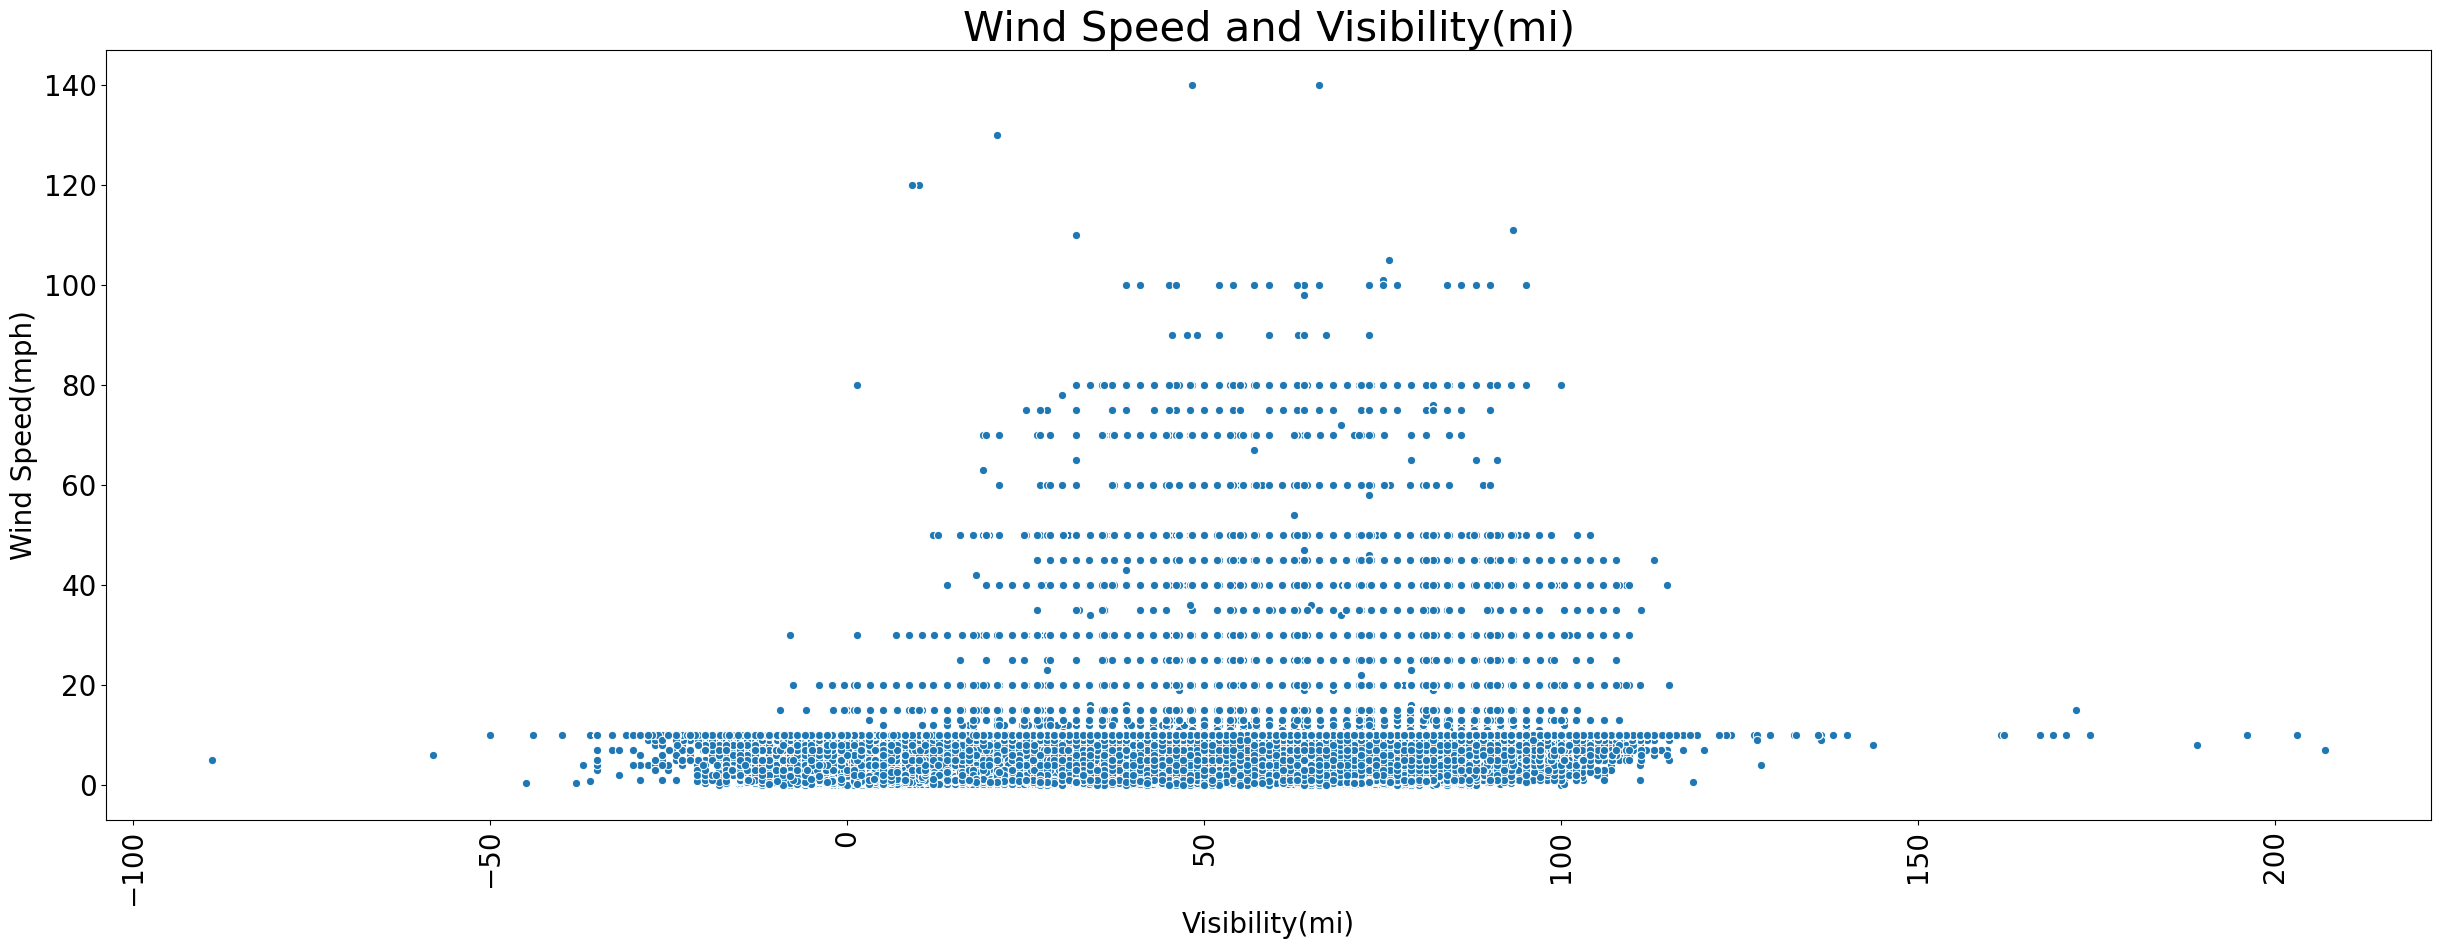

In [26]:
# Wind Speed and Visibility(mi)

plt.figure(figsize = (30,10))
sns.scatterplot(data = df,x=df["Temperature(F)"],y=df["Visibility(mi)"])
plt.ylabel( 'Wind Speed(mph)', size=20)
plt.xlabel( 'Visibility(mi)',size=20)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.title("Wind Speed and Visibility(mi)",size=30)
plt.show()

In [27]:
# Correlation Matrix For Numeric Columns

correlation_matrix=df[['Start_Time','End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 
            'Temperature(F)', 'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
            'Precipitation(in)']].corr()

correlation_matrix.style.background_gradient(cmap='coolwarm')


,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Start_Time,1.000000,0.999908,-0.035312,0.037587,-0.085058,0.082717,0.140410,-0.030469,0.203615,-0.020539,-0.252332,-0.022232,-0.091040,-0.061799
End_Time,0.999908,1.000000,-0.035551,0.037606,-0.085558,0.082805,0.140576,-0.030431,0.203665,-0.020437,-0.252187,-0.022206,-0.091021,-0.061781
Start_Lat,-0.035312,-0.035551,1.000000,-0.067720,0.999993,-0.121743,0.064064,-0.443781,-0.480296,0.022364,-0.194094,-0.088500,0.032908,0.000279
Start_Lng,0.037587,0.037606,-0.067720,1.000000,-0.121735,0.999999,0.007851,-0.010652,-0.031810,0.179500,0.193185,-0.015322,0.077353,0.027619
End_Lat,-0.085058,-0.085558,0.999993,-0.121735,1.000000,-0.121732,0.067932,-0.468692,-0.489578,0.027849,-0.242143,-0.116199,0.017373,-0.003639
End_Lng,0.082717,0.082805,-0.121743,0.999999,-0.121732,1.000000,0.005876,0.024084,0.006733,0.167428,0.216028,0.006155,0.092303,0.025536
Distance(mi),0.140410,0.140576,0.064064,0.007851,0.067932,0.005876,1.000000,-0.054082,-0.044309,0.008780,-0.093121,-0.037225,0.008989,-0.001480
Temperature(F),-0.030469,-0.030431,-0.443781,-0.010652,-0.468692,0.024084,-0.054082,1.000000,0.993744,-0.330939,0.109500,0.217173,0.033750,-0.004633
Wind_Chill(F),0.203615,0.203665,-0.480296,-0.031810,-0.489578,0.006733,-0.044309,0.993744,1.000000,-0.314731,0.086598,0.234022,-0.043008,-0.012143
Humidity(%),-0.020539,-0.020437,0.022364,0.179500,0.027849,0.167428,0.008780,-0.330939,-0.314731,1.000000,0.115573,-0.384261,-0.172403,0.076936
